In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import helpers

# Set GD limit
limit = 3

# Set CSV paths
teams_csv = 'data/2025/mens_summer_u20_sw_teams.csv'
scores_csv = 'data/2025/2025-06-29_mens_summer_u20_sw_results.csv'

In [20]:
teams_df = pd.read_csv(teams_csv)
teams_df

,Club ID,Club
0,175384,FC LONDON U20 MEN
1,175330,GUELPH UNITED U20 MEN
2,183424,WATERLOO UNITED U20 MEN
3,175407,WINDSOR CITY FC U20 MEN
4,175421,CAMBRIDGE UNITED U20 MEN
5,175335,HAMILTON UNITED U20 MEN
6,183433,RAILWAY CITY FC U20 MEN
7,183435,BURLINGTON SC U20 MEN WEST


In [21]:
scores_df = pd.read_csv(scores_csv)
season_name = scores_df['Name'].iloc[0]
scores_df

,Match ID,home_result,away_result,Home team,Away team,Name,Match date (EDT)
0,262612912,1,0,175384,175335,League1 Ontario U-20 Summer League (M) Southwe...,2025-04-21 20:45:00
1,262612913,1,2,183424,183435,League1 Ontario U-20 Summer League (M) Southwe...,2025-04-24 21:00:00
2,262612914,1,1,175421,183433,League1 Ontario U-20 Summer League (M) Southwe...,2025-04-25 21:15:00
3,262612915,1,2,175407,175330,League1 Ontario U-20 Summer League (M) Southwe...,2025-04-26 18:00:00
4,262612916,1,2,183433,175384,League1 Ontario U-20 Summer League (M) Southwe...,2025-04-28 20:45:00
5,262612917,1,1,183424,175421,League1 Ontario U-20 Summer League (M) Southwe...,2025-04-30 21:00:00
6,262612918,2,3,175407,183435,League1 Ontario U-20 Summer League (M) Southwe...,2025-05-03 18:00:00
7,262612919,0,2,175335,175330,League1 Ontario U-20 Summer League (M) Southwe...,2025-05-03 20:30:00
8,262612920,2,2,183424,175335,League1 Ontario U-20 Summer League (M) Southwe...,2025-05-07 21:00:00
9,262612921,2,0,183435,175330,League1 Ontario U-20 Summer League (M) Southwe...,2025-05-08 21:00:00


In [22]:
scores_list = scores_df.to_numpy()
teams_list = teams_df.to_numpy()

X = np.array(helpers.buildScoresArray(scores_list, teams_list))

In [23]:
teams = teams_df['Club'].tolist()
match_ids = scores_df['Match ID'].tolist()

X_df = pd.DataFrame(X, index=match_ids, columns=teams)
print(X_df.to_string())

           FC LONDON U20 MEN  GUELPH UNITED U20 MEN  WATERLOO UNITED U20 MEN  WINDSOR CITY FC U20 MEN  CAMBRIDGE UNITED U20 MEN  HAMILTON UNITED U20 MEN  RAILWAY CITY FC U20 MEN  BURLINGTON SC U20 MEN WEST
262612912                  1                      0                        0                        0                         0                       -1                        0                           0
262612913                  0                      0                       -1                        0                         0                        0                        0                           1
262612914                  0                      0                        0                        0                         1                        0                       -1                           0
262612915                  0                      1                        0                       -1                         0                        0                        

In [24]:
print(X_df.T.to_string())

                            262612912  262612913  262612914  262612915  262612916  262612917  262612918  262612919  262612920  262612921  262612922  262612923  262612924  262612925  262612926  262612927  262612928  262612929  262612930  262612931  262612932  262612933  262612934  262612935  262612936  262612937  262612938  262612939  262612940  262612941  262612942  262612943  262612944  262612946  262612947  262612949  262612950
FC LONDON U20 MEN                   1          0          0          0          1          0          0          0          0          0          0          1          0          0         -1          0          1          0          0          0          0          0          0          1          0         -1          0          0          0          0          1          0         -1          0          0          0          0
GUELPH UNITED U20 MEN               0          0          0          1          0          0          0          1          0       

In [25]:
M = (X.T).dot(X)
M_df = pd.DataFrame(M, index=teams, columns=teams)
print(M_df.to_string())

                            FC LONDON U20 MEN  GUELPH UNITED U20 MEN  WATERLOO UNITED U20 MEN  WINDSOR CITY FC U20 MEN  CAMBRIDGE UNITED U20 MEN  HAMILTON UNITED U20 MEN  RAILWAY CITY FC U20 MEN  BURLINGTON SC U20 MEN WEST
FC LONDON U20 MEN                           9                      0                        0                       -2                        -2                       -1                       -2                          -2
GUELPH UNITED U20 MEN                       0                     10                       -2                       -1                        -2                       -2                       -1                          -2
WATERLOO UNITED U20 MEN                     0                     -2                        9                        0                        -2                       -2                       -2                          -1
WINDSOR CITY FC U20 MEN                    -2                     -1                        0               

In [26]:
M_bar = M.copy()
M_bar[-1,:] = np.ones(M.shape[0])
M_bar
M_bar_df = pd.DataFrame(M_bar, index=teams, columns=teams)
print(M_bar_df.to_string())

                            FC LONDON U20 MEN  GUELPH UNITED U20 MEN  WATERLOO UNITED U20 MEN  WINDSOR CITY FC U20 MEN  CAMBRIDGE UNITED U20 MEN  HAMILTON UNITED U20 MEN  RAILWAY CITY FC U20 MEN  BURLINGTON SC U20 MEN WEST
FC LONDON U20 MEN                           9                      0                        0                       -2                        -2                       -1                       -2                          -2
GUELPH UNITED U20 MEN                       0                     10                       -2                       -1                        -2                       -2                       -1                          -2
WATERLOO UNITED U20 MEN                     0                     -2                        9                        0                        -2                       -2                       -2                          -1
WINDSOR CITY FC U20 MEN                    -2                     -1                        0               

In [27]:
p = np.array(helpers.buildGDArray(scores_list, teams_list))
p_bar = p
p_bar[-1] = 0
p_bar_df = pd.DataFrame(p_bar, index=teams, columns=['GD'])
print(p_bar_df.to_string())

                            GD
FC LONDON U20 MEN            6
GUELPH UNITED U20 MEN       -9
WATERLOO UNITED U20 MEN    -16
WINDSOR CITY FC U20 MEN    -13
CAMBRIDGE UNITED U20 MEN     5
HAMILTON UNITED U20 MEN     -2
RAILWAY CITY FC U20 MEN     25
BURLINGTON SC U20 MEN WEST   0


In [28]:
# gd vector with blowouts accounted for
p_bw = np.array(helpers.buildGDArray(scores_list, teams_list, 3))
p_bar_bw = p_bw
p_bar_bw[-1] = 0
p_bar_bw_df = pd.DataFrame(p_bar_bw, index=teams, columns=['GD with limited blowouts'])
print(p_bar_bw_df.to_string())

                            GD with limited blowouts
FC LONDON U20 MEN                                  6
GUELPH UNITED U20 MEN                             -8
WATERLOO UNITED U20 MEN                           -9
WINDSOR CITY FC U20 MEN                          -12
CAMBRIDGE UNITED U20 MEN                           4
HAMILTON UNITED U20 MEN                           -2
RAILWAY CITY FC U20 MEN                           17
BURLINGTON SC U20 MEN WEST                         0


In [29]:
r = np.linalg.inv(M_bar).dot(p_bar)
r_df = pd.DataFrame(r, index=teams, columns=['massey_rating']).sort_values(by=['massey_rating'], ascending=False)
print(r_df)

                            massey_rating
RAILWAY CITY FC U20 MEN          2.120877
FC LONDON U20 MEN                1.028205
CAMBRIDGE UNITED U20 MEN         0.276106
BURLINGTON SC U20 MEN WEST       0.152132
HAMILTON UNITED U20 MEN         -0.231150
WINDSOR CITY FC U20 MEN         -0.806615
GUELPH UNITED U20 MEN           -1.030889
WATERLOO UNITED U20 MEN         -1.508665


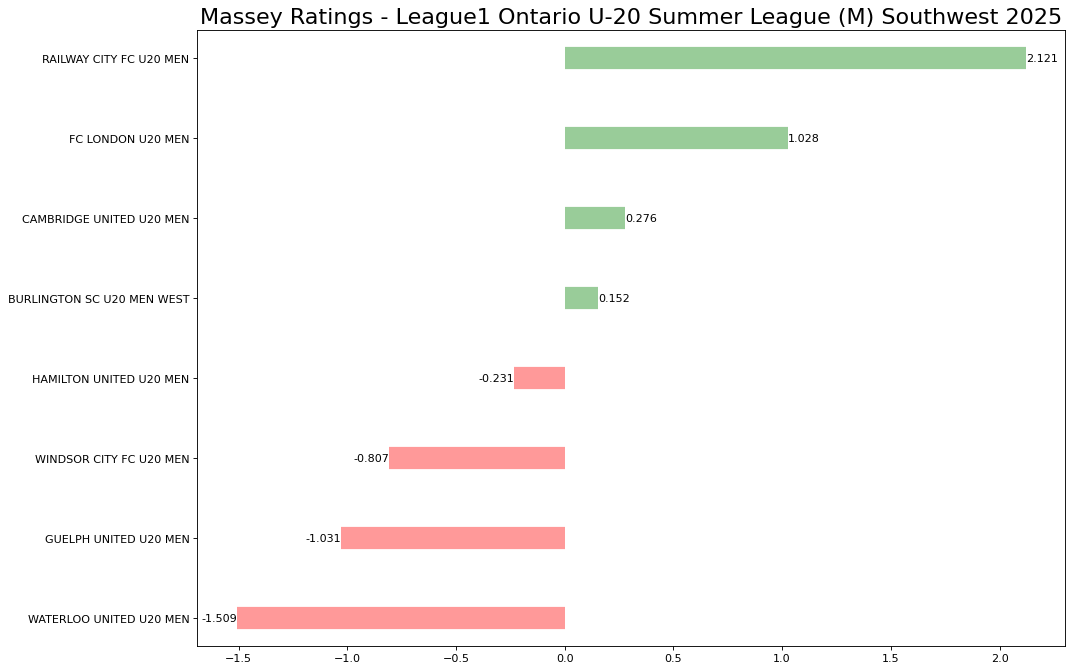

In [30]:
# Draw plot
plt.figure(figsize=(14, 10), dpi=80)

# resort values
r_df = r_df.sort_values(by=['massey_rating'])

# Plotting the horizontal lines
clrs = ['r' if (x < 0) else 'g' for x in r_df['massey_rating']]
plt.hlines(y=r_df.index, xmin=0, xmax=r_df.massey_rating, linewidth=20, colors=clrs, alpha=0.4)
for index, value in enumerate(r_df.massey_rating):
  alignment = 'left'
  if value < 0:
    alignment = 'right'
  plt.text(value, index, str(round(value, 3)), ha=alignment, va='center')

# Title of Bar Chart
plt.title(f'Massey Ratings - {season_name}', fontdict={'size': 20})

# Displaying the Diverging Bar Chart
plt.show()

In [31]:
r_bw = np.linalg.inv(M_bar).dot(p_bar_bw)
r_bw_df = pd.DataFrame(r_bw, index=teams, columns=['massey_rating']).sort_values(by=['massey_rating'], ascending=False)
print(r_bw_df)

                            massey_rating
RAILWAY CITY FC U20 MEN          1.429483
FC LONDON U20 MEN                0.873468
BURLINGTON SC U20 MEN WEST       0.239049
CAMBRIDGE UNITED U20 MEN         0.227582
HAMILTON UNITED U20 MEN         -0.205489
WATERLOO UNITED U20 MEN         -0.841860
GUELPH UNITED U20 MEN           -0.859472
WINDSOR CITY FC U20 MEN         -0.862761


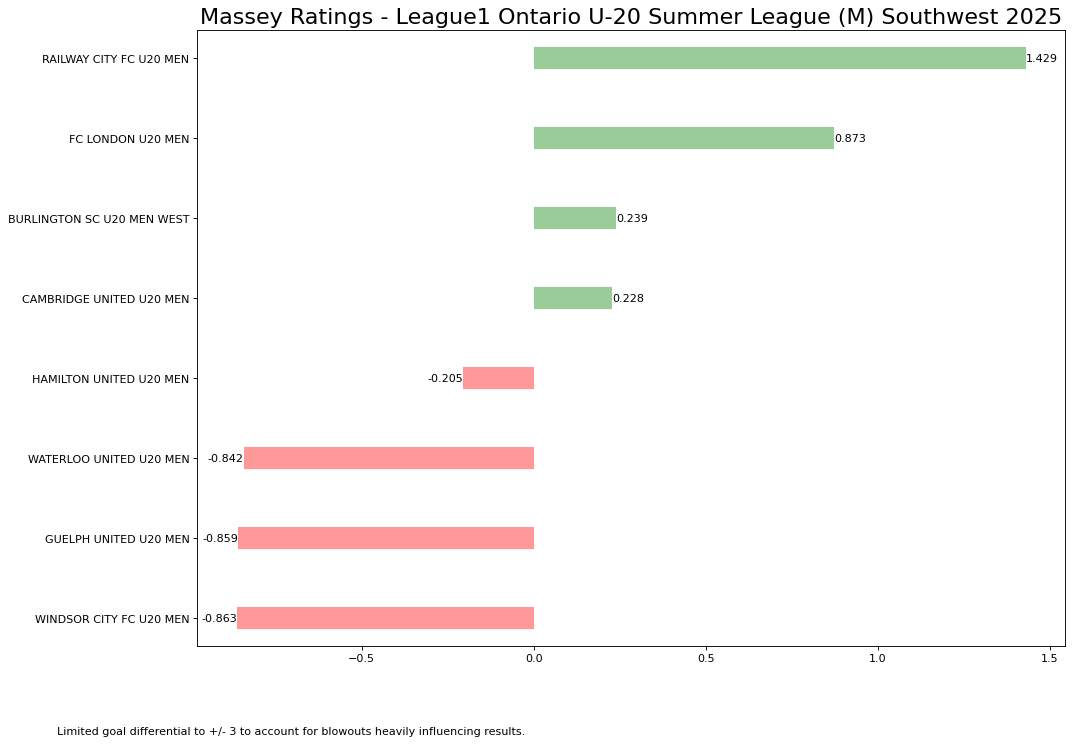

In [32]:
# Draw plot
plt.figure(figsize=(14, 10), dpi=80)

# resort values
r_bw_df = r_bw_df.sort_values(by=['massey_rating'])

# Plotting the horizontal lines
clrs = ['r' if (x < 0) else 'g' for x in r_bw_df['massey_rating']]
plt.hlines(y=r_bw_df.index, xmin=0, xmax=r_bw_df.massey_rating, linewidth=20, colors=clrs, alpha=0.4)
for index, value in enumerate(r_bw_df.massey_rating):
  alignment = 'left'
  if value < 0:
    alignment = 'right'
  plt.text(value, index, str(round(value, 3)), ha=alignment, va='center')

# Title of Bar Chart
plt.title(f'Massey Ratings - {season_name}', fontdict={'size': 20})
plt.figtext(s=f'Limited goal differential to +/- {str(limit)} to account for blowouts heavily influencing results.', y=0, x=0)

# Displaying the Diverging Bar Chart
plt.show()